# Topical Chats Parquet Validation

Since the preprocessing steps are more or less identical for all splits, we only examine how the train split is setup.

In [44]:
import fasttext
import matplotlib.pyplot as plt
import pandas as pd

from collections import Counter

## Load Data

In [2]:
train_data = pd.read_parquet("../data/intermediate/topical_chat_parquet/conversations/train.parquet")

### View Sample Rows

In [3]:
train_data.head()

,conversation_id,turn_index,message,agent,sentiment,knowledge_source,turn_rating
0,t_bde29ce2-4153-4056-9eb7-f4ad710505fe,1,Are you a fan of Google or Microsoft?,agent_1,Curious to dive deeper,[FS1],Good
1,t_bde29ce2-4153-4056-9eb7-f4ad710505fe,2,Both are excellent technology they are helpful...,agent_2,Curious to dive deeper,[FS1],Excellent
2,t_bde29ce2-4153-4056-9eb7-f4ad710505fe,3,"I'm not a huge fan of Google, but I use it a ...",agent_1,Curious to dive deeper,[FS1],Good
3,t_bde29ce2-4153-4056-9eb7-f4ad710505fe,4,Google provides online related services and pr...,agent_2,Curious to dive deeper,[FS1],Excellent
4,t_bde29ce2-4153-4056-9eb7-f4ad710505fe,5,"Yeah, their services are good. I'm just not a ...",agent_1,Curious to dive deeper,[FS1],Good


### Basic Type Info

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188378 entries, 0 to 188377
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   conversation_id   188378 non-null  object
 1   turn_index        188378 non-null  int64 
 2   message           188378 non-null  object
 3   agent             188378 non-null  object
 4   sentiment         188378 non-null  object
 5   knowledge_source  188378 non-null  object
 6   turn_rating       188378 non-null  object
dtypes: int64(1), object(6)
memory usage: 10.1+ MB


In [16]:
train_data.describe()

,turn_index
count,188378.000000
mean,11.486724
std,6.452915
min,1.000000
25%,6.000000
50%,11.000000
75%,17.000000
max,53.000000


### Any Missing Data?

In [17]:
train_data.isna().sum()

conversation_id     0
turn_index          0
message             0
agent               0
sentiment           0
knowledge_source    0
turn_rating         0
dtype: int64

### Validate that `knowledge_source` is read as an array type

In [5]:
train_data['knowledge_source'][0][0]

'FS1'

### Conversation turn length descriptive statistics

In [9]:
train_data["conversation_id"].value_counts().describe()

count    8628.000000
mean       21.833333
std         1.749144
min        20.000000
25%        21.000000
50%        21.000000
75%        22.000000
max        53.000000
Name: conversation_id, dtype: float64

Most turn lengths are approximately in the `[20,22]` range.

### Turn Length Distribution

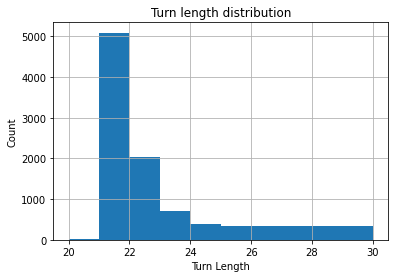

In [15]:
train_data["conversation_id"].value_counts().hist(bins=[20, 21, 22, 23, 24, 25, 30])
plt.xlabel('Turn Length')
plt.ylabel('Count')
plt.title('Turn length distribution')

plt.show()

The length of a topical chat turn is very controlled. All conversations are of at least 20 turns minimum.

## Field Analysis

### `agent`

In [18]:
train_data['agent'].value_counts()

agent_1    97204
agent_2    91174
Name: agent, dtype: int64

Somewhat evenly distributed turns. We'd expect most of the turns to be paired

### `sentiment`

In [19]:
train_data['sentiment'].value_counts()

Curious to dive deeper    80888
Neutral                   41367
Surprised                 30638
Happy                     29617
Sad                        2533
Disgusted                  1433
Fearful                    1026
Angry                       876
Name: sentiment, dtype: int64

Most turns (~122k out of ~188k) don't have an associated sentiment. Do these sentiment labels make sense?

#### Examples of each type

##### Surprised

In [32]:
examples = train_data[train_data['sentiment'] == "Surprised"]['message'].sample(10)

for example in examples:
    print(example)
    print()

Huh, I'm not into Bill murray. So I wonder why he likes it.

snowboarding in the rainforest? I'm assuming you mean Norway haha, idk I haven't been to either

If it doesnt spin,  is some of the planet forever in the dark? 

Yep I agree with you. I'm just glad we live in present-day where we have access to video games. And we don't live back in 50 BC where people are using chickens for entertainment LOL

No, my son is into these Star Wars cartoons at the moment.  I hear there 750 episodes of Pokemon, I don't feel that there is a need for that much.  

I very rarely visit that site!  I usually get my knew from the local newspaper.  I am learning a lot here though... like there is no rule against female players playing in the NFL.

I didn't know that either. An iPhone has more computing power than the entire US nuclear ICBM deterrent systme.

I wonder what the difference is?  Teddy Roosevelt had over 20 pets.  I didn't know this, but he had a bear (teddy bear).

Seahorses!

Yes I agree wit

##### Happy

In [33]:
examples = train_data[train_data['sentiment'] == "Happy"]['message'].sample(10)

for example in examples:
    print(example)
    print()

I have no idea? Was JFK one. I know his dad was wealthy.

Yeah... He has enough to buy IMDB. I had no clue...

Yea I think it was due to the success of their debut album.

I traveled many place. But my favorite travel place is paris. What about you?

That's odd. Soldier field is just ok. The Shedd is really good though. Where else, besides chicago do you like going?

hahaha My dog doesn't like snakes.  He should be a New Zealand dog since there are no snakes there!

oh...very nice explanation. 

I think they have been accused of that. lol  The percentage of airtime on Fox news dedicated to opinion is 55%...for MSNBC it's 85%!

Nice chatting with you too!! Have a good one!

Have you heard of the Guttenberg project? So many books whose copyrights have expired are fully uploaded to that site!



##### Sad

In [34]:
examples = train_data[train_data['sentiment'] == "Sad"]['message'].sample(10)

for example in examples:
    print(example)
    print()

Yes that was horrible.  He was gunned down while biking!

Oh I see so you must relate to the article as well, its hard when you are all alone in your home and your kids are gone

Also, then we'd run out of jobs ... yeah the math gets wonky there.

Are you interested in cars? I did not know that Benz was the inventor of the  auto. Did you?

She's the author of "For Colored Girls". Sadly, she disappeared for a bit due to decades of physical and mental health challenges.

I do not own one as my dad was allergic to them when I was a child. Now, I am slightly afraid to get a dog as I have no clue how to take care of them.

I feel bad for those that work in their warehouses, having to walk 7 to 15 miles a day, and not for much reimbursement.

I would feel bad for him, he invents something, then everybody is better than him. I wonder if he regrets inventing it. 

So very sad. It makes me scared for when my kids need to go to school.

Maybe because the players are who the fans come to see?  I 

##### Disgusted

In [35]:
examples = train_data[train_data['sentiment'] == "Disgusted"]['message'].sample(10)

for example in examples:
    print(example)
    print()

Agreed. American Idol used to be one of my favorite shows when I was younger. It used to be mainly about the singing, now it's about the frills and diversions. 

But he also drummed on cardboard boxes and beat rolled-up newspapers against the studio walls in place of snare drums.“I’d just grab whatever was in the studio and try to get a groove going

The problems lie in the facts that it is doing nothing but driving us deeper into debt as federal funding goes to these pointless projects that are driven in the name of research for research's sake and has no practical value. 

Hello! Yes I have heard it, it's terrible. I think it's indicative of a larger problem. Trump was going to speak for Cindy Hyde-Smith that same day I believe, and she made a joke recently about a "public hanging", it's absurd.

And a lot of media corporations are trying to start their own streaming services for their content so that people will have to be nickel and dimed subscribing to a whole lot of different ser

##### Fearful

In [36]:
examples = train_data[train_data['sentiment'] == "Fearful"]['message'].sample(10)

for example in examples:
    print(example)
    print()

I think I might prefer Mackinac Island in Michigan which doesn't allow motorized vehicles.

Maybe.  If one complains about Fox's bias then one should complain about the bias of all new channels.  They don't which reflect their own bias. 

It's interesting how important gun control has become, but that's because we have guns like the AR-15

True. But a deadly force instructor said that it's better to only drive when you're driving, and to only shoot when you're shooting. But sometimes I guess shooting through the windshield is the only option, especially if there are bystanders

It is crazy, it;s sad because they have all their lives in front of them. You know the police detained a man but didn't file charges.

I think that lowering the price on drugs will make the people consume more and wont change things it all, it will only make things worse.

Great! Hope you're doing well! Did you hear about Jonathan Bennet ambushing police in Charlotte? That was an intense situation!

That is a lo

##### Angry

In [37]:
examples = train_data[train_data['sentiment'] == "Angry"]['message'].sample(10)

for example in examples:
    print(example)
    print()

Probably. The whole situation is just bad. Like who thinks that comments like that are okay especially in this day and age!?

And they are situated in New-York, I would have thought that would be situated in in the deep south, for me, they will sound even stranger when they blame the NY elite. 

I am not a fan of Mitch McConnell.  The senate majority leader has gone somewhat nuts.

Did you hear Russia gave delegates and heads of state thumb drives and charges that had viruses

I have many but I would have to go with the Corvette.  I would just have to remember not to warm it up in Ohio. 

That is horrible. It killed 48 people and it seems that isn't the first time it has happened either. 

Oh my! I didn't realize with all the more recent bailouts I've been hearing bout

I would change the locks and cut off contact if he was my son.  Sometimes tough love is the way to go.  Everything else has not worked yet.

Yes, that one is quite travel-friendly. What I don't really like is Amazon's p

#### Validation using Empathetic Dialogues emotion classifier

In [39]:
!wget https://dl.fbaipublicfiles.com/parlai/empatheticdialogues/models/fasttext_empathetic_dialogues.mdl -P ../models/external/empathetic_dialogues

--2021-06-27 23:25:16--  https://dl.fbaipublicfiles.com/parlai/empatheticdialogues/models/fasttext_empathetic_dialogues.mdl
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 2606:4700:10::6816:4b8e, 2606:4700:10::ac43:904, 2606:4700:10::6816:4a8e, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|2606:4700:10::6816:4b8e|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 809096299 (772M) [application/octet-stream]
Saving to: ‘../models/external/empathetic_dialogues/fasttext_empathetic_dialogues.mdl’

fasttext_empathetic 100%[===================>] 771.61M  2.10MB/s    in 4m 40s  

2021-06-27 23:29:56 (2.76 MB/s) - ‘../models/external/empathetic_dialogues/fasttext_empathetic_dialogues.mdl’ saved [809096299/809096299]



In [47]:
emotion_classifier = fasttext.load_model("../models/external/empathetic_dialogues/fasttext_empathetic_dialogues.mdl")

In [62]:
for emotion in ["Surprised", "Happy", "Sad", "Disgusted", "Fearful", "Angry"]:
    emotion_labeled_responses = [response.replace("\n", " ") for response in  train_data[train_data['sentiment'] == emotion]['message'].tolist()]
    
    predictions = emotion_classifier.predict(emotion_labeled_responses, k=3)
    
    top_emotion = Counter()
    second_emotion = Counter()
    third_emotion = Counter()
    
    for labels in predictions[0]:
    
        
        top_emotion[labels[0]] += 1
        second_emotion[labels[1]] += 1
        third_emotion[labels[2]] += 1
        
    print(f"True emotion: {emotion}")
    print("Most frequent predicted emotions at each position:")
    
    print(top_emotion.most_common(4))
    print(second_emotion.most_common(4))
    print(third_emotion.most_common(4))
    
    print()

True emotion: Surprised
Most frequent predicted emotions at each position:
[('__label__impressed', 5512), ('__label__surprised', 4757), ('__label__nostalgic', 1721), ('__label__disgusted', 1487)]
[('__label__impressed', 3772), ('__label__surprised', 3119), ('__label__proud', 1684), ('__label__hopeful', 1474)]
[('__label__surprised', 2433), ('__label__impressed', 2333), ('__label__hopeful', 1531), ('__label__proud', 1481)]

True emotion: Happy
Most frequent predicted emotions at each position:
[('__label__impressed', 4969), ('__label__surprised', 2766), ('__label__content', 2027), ('__label__nostalgic', 1985)]
[('__label__impressed', 3133), ('__label__surprised', 2190), ('__label__proud', 1772), ('__label__confident', 1681)]
[('__label__impressed', 2244), ('__label__surprised', 1926), ('__label__joyful', 1666), ('__label__hopeful', 1631)]

True emotion: Sad
Most frequent predicted emotions at each position:
[('__label__impressed', 203), ('__label__disappointed', 197), ('__label__surpris

A lot of the utterances seem to be classified as impressed, what's the deal?